<center style="font-size:48px;">Exploratory Data Analysis</center>

In [1]:
import pandas as pd
import seaborn as sns

cars = pd.read_csv('../Data/car-assignments.csv')
cc = pd.read_csv('../Data/cc_data.csv', encoding='cp1252')
gps = pd.read_csv('../Data/gps.csv', parse_dates=['Timestamp'])
loyalty = pd.read_csv('../Data/loyalty_data.csv', encoding='cp1252')

## Cars

In [12]:
cars.head()

,LastName,FirstName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
0,Alcazar,Lucas,1.0,Information Technology,IT Helpdesk
1,Azada,Lars,2.0,Engineering,Engineer
2,Balas,Felix,3.0,Engineering,Engineer
3,Barranco,Ingrid,4.0,Executive,SVP/CFO
4,Baza,Isak,5.0,Information Technology,IT Technician


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LastName                44 non-null     object 
 1   FirstName               44 non-null     object 
 2   CarID                   35 non-null     float64
 3   CurrentEmploymentType   44 non-null     object 
 4   CurrentEmploymentTitle  44 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.8+ KB


In [23]:
# See if we have any duplicate entries
print("There are {} duplicate entries for a person".format(cars[['FirstName', 'LastName']].duplicated().sum()))

There are 0 duplicates entries for a person


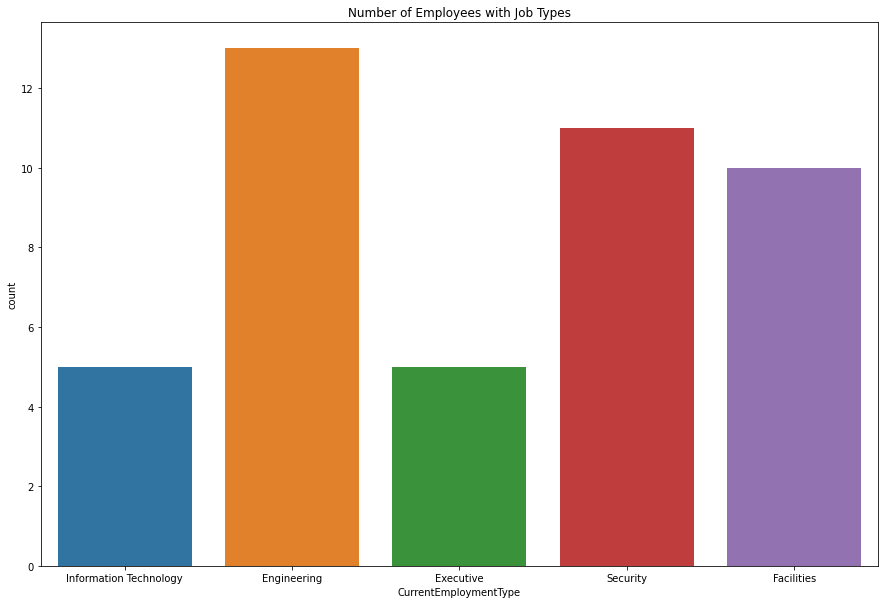

,count
CurrentEmploymentType,
Engineering,13
Security,11
Facilities,10
Executive,5
Information Technology,5


In [87]:
# Find the number of employees for each job type
plt.subplots(figsize = (15,10))
sns.countplot(x= 'CurrentEmploymentType', data = cars)
plt.title('Number of Employees with Job Types')
plt.show()
cars.groupby('CurrentEmploymentType')['LastName'].agg(['count']).sort_values('count', ascending=False)

The Engineering group as the most employees; 13. Executives and IT groups have the least; 5.

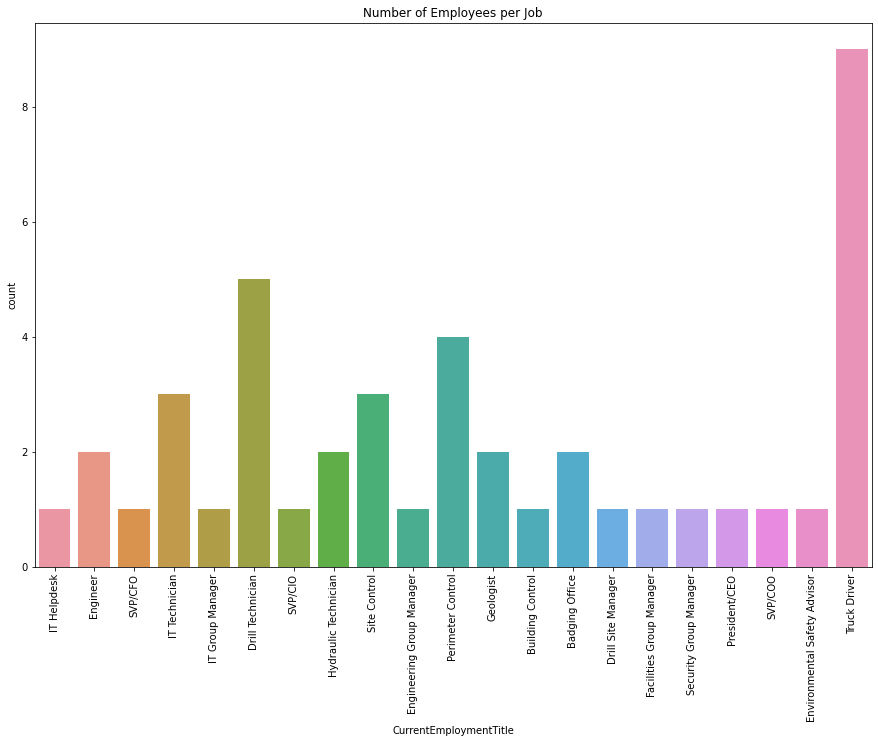

,count
CurrentEmploymentTitle,
Truck Driver,9
Drill Technician,5
Perimeter Control,4
Site Control,3
IT Technician,3
Geologist,2
Hydraulic Technician,2
Badging Office,2
Engineer,2


In [91]:
# Find the number of employees for each job title
plt.subplots(figsize = (15,10))
sns.countplot(x= 'CurrentEmploymentTitle', data = cars)
plt.title('Number of Employees per Job')
plt.xticks(rotation =90)
plt.show()
cars.groupby('CurrentEmploymentTitle')['LastName'].agg(['count']).sort_values('count', ascending=False)

Truck Drivers have the most employees; 9. Most job titles only have one employees.

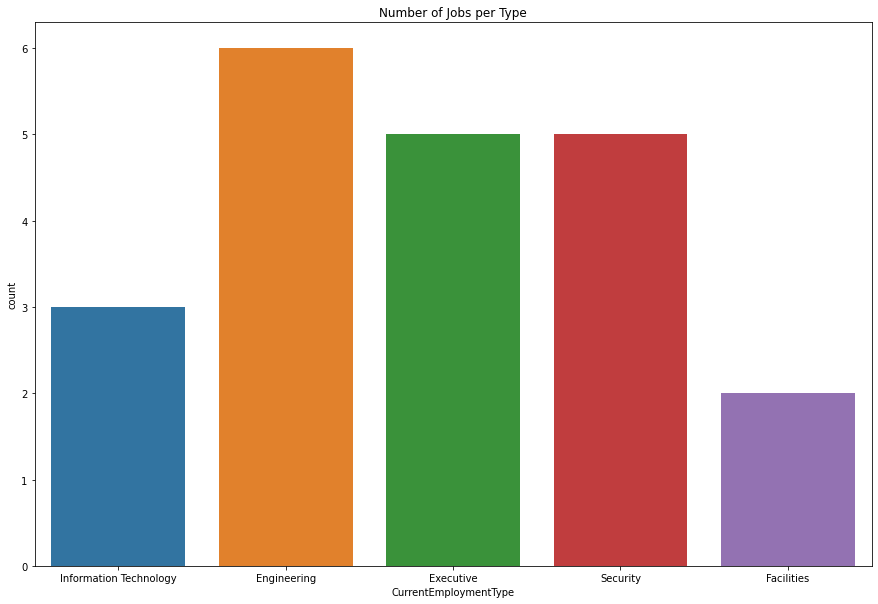

,CurrentEmploymentTitle
,count
CurrentEmploymentType,
Engineering,13
Executive,5
Facilities,10
Information Technology,5
Security,11


In [98]:
# Job titles that belong in a job type
grouped = cars[['CurrentEmploymentTitle', 'CurrentEmploymentType']].drop_duplicates()
plt.subplots(figsize = (15,10))
sns.countplot(x= 'CurrentEmploymentType', data = grouped)
plt.title('Number of Jobs per Type')
plt.show()
cars[['CurrentEmploymentTitle', 'CurrentEmploymentType']].groupby('CurrentEmploymentType').agg(['count'])

The Engineering group as the most job titles; 6. Facilities have the least; 2.

In [35]:
# Lets see which jobs are grouped into which tyoe
for types in cars['CurrentEmploymentType'].unique():
    job = cars[cars['CurrentEmploymentType'] == types]['CurrentEmploymentTitle'].unique()
    print("{} : {}".format(types, job))

Information Technology : ['IT Helpdesk' 'IT Technician' 'IT Group Manager']
Engineering : ['Engineer' 'Drill Technician' 'Hydraulic Technician'
 'Engineering Group Manager' 'Geologist' 'Drill Site Manager']
Executive : ['SVP/CFO' 'SVP/CIO' 'President/CEO' 'SVP/COO'
 'Environmental Safety Advisor']
Security : ['Site Control' 'Perimeter Control' 'Building Control' 'Badging Office'
 'Security Group Manager']
Facilities : ['Facilities Group Manager' 'Truck Driver']


In [40]:
# Are there any comminatlities to any of the null entries
cars[cars['CarID'].isnull()]

,LastName,FirstName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
35,Hafon,Albina,NaN,Facilities,Truck Driver
36,Hawelon,Benito,NaN,Facilities,Truck Driver
37,Hawelon,Claudio,NaN,Facilities,Truck Driver
38,Mies,Henk,NaN,Facilities,Truck Driver
39,Morlun,Valeria,NaN,Facilities,Truck Driver
40,Morlun,Adan,NaN,Facilities,Truck Driver
41,Morluniau,Cecilia,NaN,Facilities,Truck Driver
42,Nant,Irene,NaN,Facilities,Truck Driver
43,Scozzese,Dylan,NaN,Facilities,Truck Driver


It looks like all the null entries are for the carID for the nine truck drivers. This makes sence as in the problem statement it says that the truck drivers are not assigned company cars that can be used for personal use.

## GPS

In [36]:
gps.head()

,Timestamp,id,lat,long
0,2014-01-06 06:28:01,35,36.076225,24.874689
1,2014-01-06 06:28:01,35,36.076220,24.874596
2,2014-01-06 06:28:03,35,36.076211,24.874443
3,2014-01-06 06:28:05,35,36.076217,24.874253
4,2014-01-06 06:28:06,35,36.076214,24.874167


In [41]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685169 entries, 0 to 685168
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  685169 non-null  datetime64[ns]
 1   id         685169 non-null  int64         
 2   lat        685169 non-null  float64       
 3   long       685169 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 20.9 MB


In [59]:
timeUnit = ['year', 'month', 'day', 'hour', 'minute', 'second']
for unit in timeUnit:
    if unit == 'year':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.year)
    if unit == 'month':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.month)
    if unit == 'day':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.day)
    if unit == 'hour':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.hour)
    if unit == 'minute':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.minute)
    if unit == 'second':
        gps[unit] = gps['Timestamp'].apply(lambda x: x.second)
gps.head()

,Timestamp,id,lat,long,day,year,month,hour,minute,second
0,2014-01-06 06:28:01,35,36.076225,24.874689,6,2014,1,6,28,1
1,2014-01-06 06:28:01,35,36.076220,24.874596,6,2014,1,6,28,1
2,2014-01-06 06:28:03,35,36.076211,24.874443,6,2014,1,6,28,3
3,2014-01-06 06:28:05,35,36.076217,24.874253,6,2014,1,6,28,5
4,2014-01-06 06:28:06,35,36.076214,24.874167,6,2014,1,6,28,6


In [60]:
gps.describe()

,id,lat,long,day,year,month,hour,minute,second
count,685169.000000,685169.000000,685169.000000,685169.000000,685169.0,685169.0,685169.000000,685169.000000,685169.000000
mean,26.159812,36.060548,24.876437,12.111915,2014.0,1.0,13.056592,29.109608,28.656336
std,28.526543,0.009599,0.013773,3.843642,0.0,0.0,4.471109,17.138107,17.367938
min,1.000000,36.048021,24.825088,6.000000,2014.0,1.0,0.000000,0.000000,0.000000
25%,9.000000,36.051953,24.868031,9.000000,2014.0,1.0,8.000000,15.000000,13.000000
50%,19.000000,36.058056,24.876464,13.000000,2014.0,1.0,13.000000,28.000000,28.000000
75%,29.000000,36.067906,24.883817,16.000000,2014.0,1.0,17.000000,44.000000,44.000000
max,107.000000,36.089960,24.908485,19.000000,2014.0,1.0,23.000000,59.000000,59.000000


In [66]:
gps.groupby('id')[['lat', 'long', 'hour']].agg(['mean', 'median'])

lat                  long                  hour       
          mean     median       mean     median       mean median
id                                                               
1    36.060033  36.058859  24.876039  24.877926  14.003728   13.0
2    36.067263  36.069479  24.869212  24.868909  12.022245   12.0
3    36.067109  36.069341  24.868704  24.868593  12.019691   12.0
4    36.065575  36.068363  24.872111  24.871792  12.885404   13.0
5    36.058821  36.056955  24.875024  24.876413  13.657075   13.0
6    36.058278  36.055950  24.880165  24.879580  12.920778   13.0
7    36.066151  36.068368  24.872431  24.874152  12.549394   13.0
8    36.058629  36.057099  24.881333  24.882474  13.870829   13.0
9    36.066434  36.068973  24.870308  24.872305  12.428602   12.0
10   36.064820  36.068160  24.870841  24.871678  12.558245   12.0
11   36.067215  36.069433  24.869525  24.869936  12.097034   12.0
12   36.058651  36.059495  24.882568  24.882484  13.284376   14.0
13   36.057782  36.056619  24.881289  24.880910  13.376598   13.0
14   36.059286  36.057426  24.881384  24.881605  12.623687   12.0
15   36.059003  36.056732  24.880178  24.879577  11.785388   12.0
16   36.057386  36.055747  24.883367  24.881128  13.294844   13.0
17   36.055883  36.054777  24.884716  24.884206  13.209961   13.0
18   36.060174  36.059428  24.881192  24.881156  12.866278   13.0
19   36.067834  36.069480  24.868264  24.868185  11.925639   12.0
20   36.057082  36.055982  24.885106  24.883445  12.839538   13.0
21   36.058320  36.056690  24.881835  24.881341  12.519749   12.0
22   36.055838  36.054758  24.880147  24.879624  13.907956   13.0
23   36.055125  36.053252  24.883148  24.881589  12.807808   13.0
24   36.060426  36.058696  24.880335  24.879581  12.926634   12.0
25   36.057032  36.054726  24.881874  24.881724  13.358735   13.0
26   36.060284  36.059292  24.880444  24.882475  13.191120   13.0
27   36.058399  36.056797  24.879016  24.881186  13.316023   13.0
28   36.065226  36.065271  24.872405  24.872649  14.077165   17.0
29   36.054999  36.054664  24.882031  24.882001  13.400851   13.0
30   36.056863  36.055615  24.882862  24.881321  13.349946   14.0
31   36.061995  36.060513  24.882061  24.882473  12.876996   13.0
32   36.063748  36.065595  24.873176  24.874329  13.202496   13.0
33   36.058724  36.056898  24.883867  24.882496  12.911222   13.0
34   36.058949  36.057892  24.883568  24.880768  13.351394   13.0
35   36.064263  36.064564  24.872149  24.873304  13.571386   13.0
101  36.052772  36.050389  24.866290  24.871064  12.279316   12.0
104  36.050168  36.050256  24.857349  24.858522  15.655813   17.0
105  36.054617  36.055267  24.883876  24.880854  14.918208   17.0
106  36.058195  36.056649  24.873788  24.879574  15.236358   16.0
107  36.056280  36.056170  24.877135  24.881080  12.808563   13.0

<AxesSubplot:>

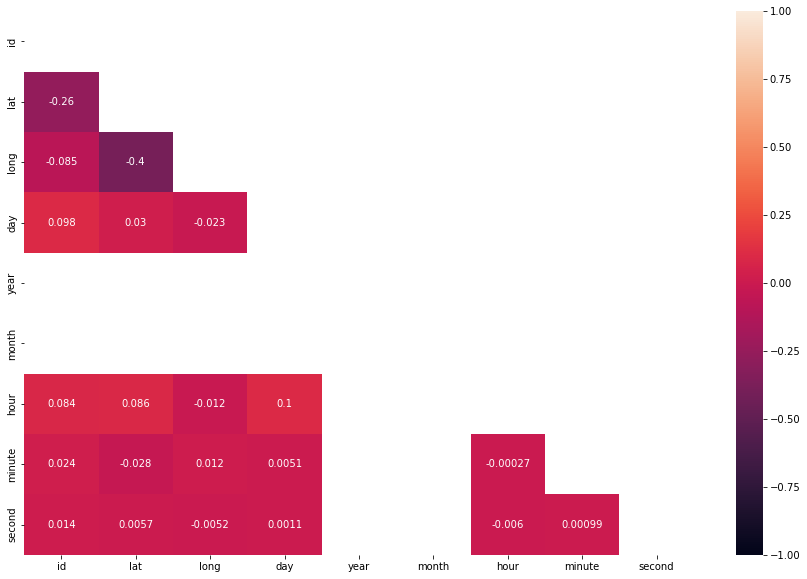

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, figsize=(15,10))
sns.heatmap(gps.corr(), vmin=-1, vmax= 1, annot=True, mask = np.triu(np.ones_like(gps.corr())))


## Credit Cards

In [75]:
cc.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014 7:28,Brew've Been Served,11.34,Edvard,Vann
1,1/6/2014 7:34,Hallowed Grounds,52.22,Hideki,Cocinaro
2,1/6/2014 7:35,Brew've Been Served,8.33,Stenig,Fusil
3,1/6/2014 7:36,Hallowed Grounds,16.72,Birgitta,Frente
4,1/6/2014 7:37,Brew've Been Served,4.24,Sven,Flecha


In [76]:
cc.groupby('location').count().sort_values('timestamp', ascending=False)

,timestamp,price,FirstName,LastName
location,,,,
Katerina’s Café,212,212,212,212
Hippokampos,171,171,171,171
Guy's Gyros,158,158,158,158
Brew've Been Served,156,156,156,156
Hallowed Grounds,92,92,92,92
Ouzeri Elian,87,87,87,87
Abila Zacharo,72,72,72,72
Kalami Kafenion,64,64,64,64
Gelatogalore,64,64,64,64


In [77]:
import numpy as np
cc.groupby('location')['price'].agg(['mean', 'median']).sort_values('mean', ascending=False)

,mean,median
location,,
Abila Airport,2726.138400,3138.980
Maximum Iron and Steel,2701.340000,2997.760
Abila Scrapyard,2370.522500,2023.165
Carlyle Chemical Inc.,2303.560526,1814.240
Kronos Pipe and Irrigation,2276.420000,2728.370
Stewart and Sons Fabrication,2261.803889,1745.715
Nationwide Refinery,1812.424167,1415.815
Frydos Autosupply n' More,362.701875,148.020
Roberts and Sons,196.522500,232.235


## Loyalty Data

In [62]:
loyalty.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014,Brew've Been Served,4.17,Cornelia,Lais
1,1/6/2014,Brew've Been Served,9.60,Mat,Bramar
2,1/6/2014,Hallowed Grounds,16.53,Emile,Arpa
3,1/6/2014,Coffee Shack,11.51,Varro,Awelon
4,1/6/2014,Hallowed Grounds,12.93,Rachel,Pantanal


In [63]:
loyalty.groupby('location').count().sort_values('timestamp', ascending=False)

,timestamp,price,FirstName,LastName
location,,,,
Katerina’s Café,195,195,195,195
Hippokampos,155,155,155,155
Guy's Gyros,146,146,146,146
Brew've Been Served,140,140,140,140
Ouzeri Elian,84,84,84,84
Hallowed Grounds,80,80,80,80
Abila Zacharo,71,71,71,71
Kalami Kafenion,66,66,66,66
Gelatogalore,60,60,60,60


In [64]:
import numpy as np
loyalty.groupby('location')['price'].agg(['mean', 'median']).sort_values('mean', ascending=False)

,mean,median
location,,
Maximum Iron and Steel,2701.340000,2997.760
Abila Airport,2661.723077,2901.045
Abila Scrapyard,2370.522500,2023.165
Stewart and Sons Fabrication,2283.620000,1753.170
Carlyle Chemical Inc.,2272.251053,1814.240
Kronos Pipe and Irrigation,2269.753333,2708.370
Nationwide Refinery,1947.426087,1420.390
Roberts and Sons,194.840000,221.730
Kronos Mart,185.983750,176.785


In [81]:
uniqueCC = set(cc['location']).difference(set(loyalty['location']))
print('Unique locations in the credit card dataframe : {}'.format(uniqueCC))
uniqueLoyalty = set(loyalty['location']).difference(set(cc['location']))
print('Unique locations in the credit card dataframe : {}'.format(uniqueLoyalty))

Unique locations in the credit card dataframe : {'Daily Dealz'}
Unique locations in the credit card dataframe : set()


<div>
    <span  style=width:700px;display:inline-block;align:left">
        <a href="./EDA.ipynb"><< Exploratory Data Analysis</a>
    </span>
    <span style="width:700px;display:inline-block;" align="right">
        <a href="./CleanUp.ipynb">Data Clean Up >></a>
    </span>
</div>
<div>
    <center>
        <span style="width:250px;display:inline-block">
            <a href="../Master.ipynb">Master Notebook</a>
        </span>
        <span style="width:250px;display:inline-block">
            <a href="../README.md">Table of Contents</a>
        </span>
    <center>
</div>